In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
main_df = pd.read_csv('data/train.tsv', sep= '\t')
main_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [107]:
main_df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [108]:
main_df.shape

(1482535, 8)

In [109]:
main_df.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...
1482534,1482534,Brand new lux de ville wallet,1,Women/Women's Accessories/Wallets,NaN,22.0,0,"New with tag, red with sparkle. Firm price, no..."


In [110]:
main_df['item_condition_id'].unique()

array([3, 1, 2, 4, 5])

In [111]:
#Checking min and max prices to understand what range of prices we can expect for this dataset.

max_price = main_df['price'].max()
min_price = main_df['price'].min()

print(f'Minimum price in the dataset: {min_price}')
print(f'Maximum price in the dataset: {max_price}')

Minimum price in the dataset: 0.0
Maximum price in the dataset: 2009.0


In [112]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [113]:
sample_df = main_df.sample(frac=0.04, random_state=42)
sample_df.shape

(59301, 8)

In [114]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59301 entries, 777341 to 518666
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           59301 non-null  int64  
 1   name               59301 non-null  object 
 2   item_condition_id  59301 non-null  int64  
 3   category_name      59063 non-null  object 
 4   brand_name         34172 non-null  object 
 5   price              59301 non-null  float64
 6   shipping           59301 non-null  int64  
 7   item_description   59301 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.1+ MB


In [115]:
sample_df.duplicated().sum()

0

In [116]:
sample_df.isna().sum()


train_id                 0
name                     0
item_condition_id        0
category_name          238
brand_name           25129
price                    0
shipping                 0
item_description         0
dtype: int64

In [117]:
sample_df.isna().mean()

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004013
brand_name           0.423753
price                0.000000
shipping             0.000000
item_description     0.000000
dtype: float64

<Axes: >

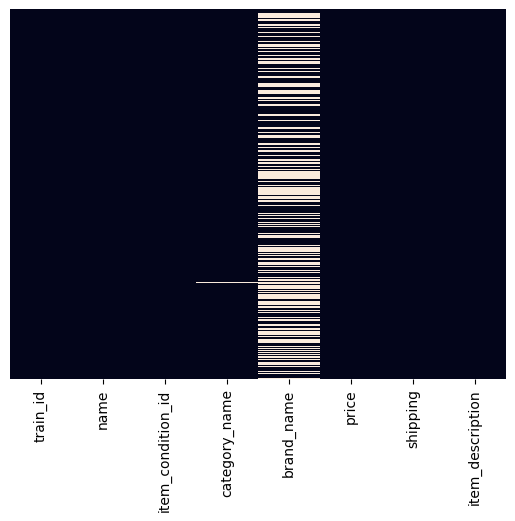

In [118]:
sns.heatmap(sample_df.isnull(),
            yticklabels=False,
            cbar=False)

In [119]:
#Dropping Null value rows because the most part is as brand name and we cant make that information up. because we have a vary large amout of rowsin the full dataset we can afford to loose some rows

sample_df = sample_df.dropna()


In [120]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34070 entries, 1463629 to 518666
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           34070 non-null  int64  
 1   name               34070 non-null  object 
 2   item_condition_id  34070 non-null  int64  
 3   category_name      34070 non-null  object 
 4   brand_name         34070 non-null  object 
 5   price              34070 non-null  float64
 6   shipping           34070 non-null  int64  
 7   item_description   34070 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.3+ MB


In [ ]:
# Dropping price because it's my y variable and train_id because it doesn't have any meaning for our analysis
plot_columns_distribution = sample_df.drop(['train_id', 'name', 'category_name', 'item_description', 'brand_name'], axis=1)

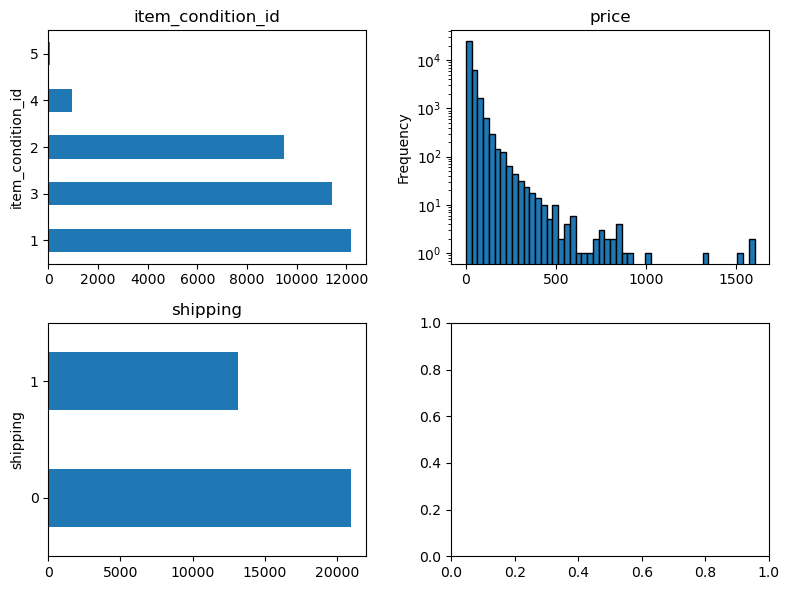

In [ ]:
# Write a loop, that goes through all column names, and creates a count plot for each one 
# Specify subplot dimensions 
nrows = 2
ncols = 2

# Create "subplot" grid 
plt.subplots(nrows, ncols, figsize=(8, 6))

# Loop through positions and add plots 
for i, col in enumerate(plot_columns_distribution.columns): 
    plt.subplot(nrows, ncols, i + 1)
    if col == 'price':  # Check if the column is "price"
        sample_df[col].plot(kind='hist', bins=50, edgecolor='black', log=True).set_title(col) 
    else:
        sample_df[col].value_counts().plot(kind='barh').set_title(col)

plt.tight_layout()
plt.show()
